In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('PokemonUniteData.csv')
df.head()

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
0,Mimikyu,“Creep” it real with a Melee All-Rounder that’...,All-Rounder,Melee,Intermediate,4.0,2.5,3.5,1.0,1.0
1,Blaziken,Get fired up with this Melee All-Rounder that ...,All-Rounder,Melee,Expert,4.0,2.5,4.0,1.0,0.5
2,Mewtwo(Mewtwo),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,3.0,3.0,2.5,2.0,2.0
3,Mewtwo(Mega Mewtwo X),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,4.0,4.0,3.0,2.0,2.0
4,Mewtwo(Mega Mewtwo Y),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,5.0,3.0,3.5,2.0,2.0


In [3]:
df.columns

Index(['Name', 'Description', 'Role', 'Ranged_or_Melee', 'UsageDifficulty',
       'Offense', 'Endurance', 'Mobility', 'Scoring', 'Support'],
      dtype='object')

In [4]:
df.shape

(61, 10)

In [5]:
#Role distribution
df['Role'].value_counts()

Attacker       20
All-Rounder    16
Defender       10
Supporter       8
Speedster       7
Name: Role, dtype: int64

In [6]:
#Ranged or melee distribution
df['Ranged_or_Melee'].value_counts()

Melee     34
Ranged    27
Name: Ranged_or_Melee, dtype: int64

<Axes: xlabel='Role,Ranged_or_Melee'>

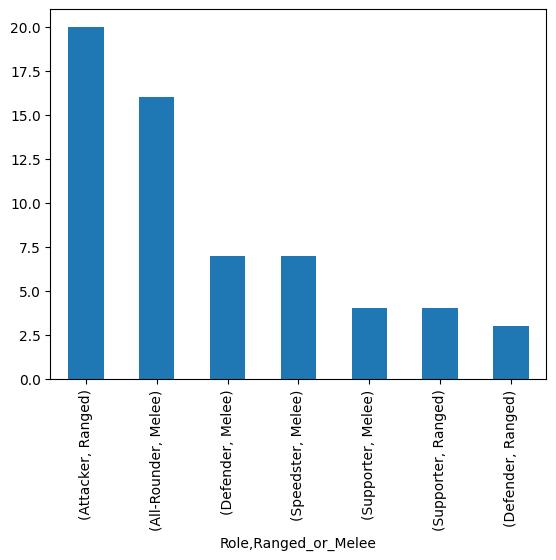

In [7]:
#Role and Ranged/melee pairwise distribution
df[['Role','Ranged_or_Melee']].value_counts().plot(kind='bar')

In [8]:
roles={}
for role in df.Role:
    roles[role]=(df[df['Role']==role])

roles.keys()

dict_keys(['All-Rounder', 'Attacker', 'Speedster', 'Defender', 'Supporter'])

In [9]:
#Attacker stats
roles['Attacker'].describe()

,Offense,Endurance,Mobility,Scoring,Support
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4.075000,2.100000,2.500000,2.250000,1.675000
std,0.494043,0.804592,0.842927,0.658947,1.138732
min,3.000000,1.000000,1.000000,1.000000,0.500000
25%,4.000000,1.500000,1.500000,2.000000,0.500000
50%,4.000000,2.000000,2.750000,2.000000,1.500000
75%,4.500000,2.625000,3.000000,2.500000,3.000000
max,5.000000,4.000000,4.000000,3.500000,3.500000


In [10]:
roles['Attacker']['Offense'].max()

5.0

In [11]:
#Max Offense Attacker
attacker_offense = roles['Attacker']['Offense']
roles['Attacker'][attacker_offense==attacker_offense.max()]

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
4,Mewtwo(Mega Mewtwo Y),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,5.0,3.0,3.5,2.0,2.0
8,Chandelure,Ignite your next fight on Aeos Island with thi...,Attacker,Ranged,Novice,5.0,1.0,1.0,2.0,3.0


In [12]:
stats = [col for col in roles['Attacker'].columns if roles['Attacker'][col].dtype=='float64']

In [13]:
def plot_stats_by_role(df,role):
    df.plot(x="Name", y=stats, kind="bar",figsize=(10,5),title=role)

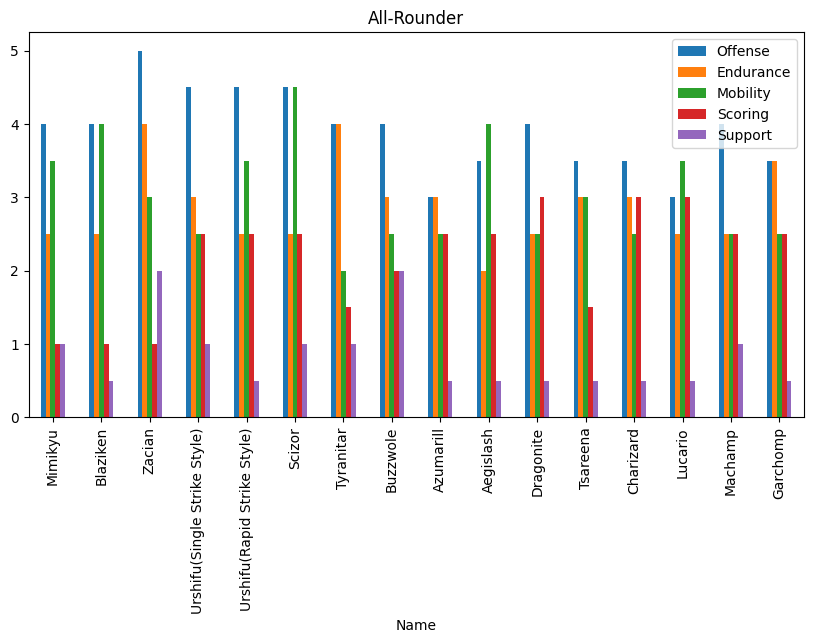

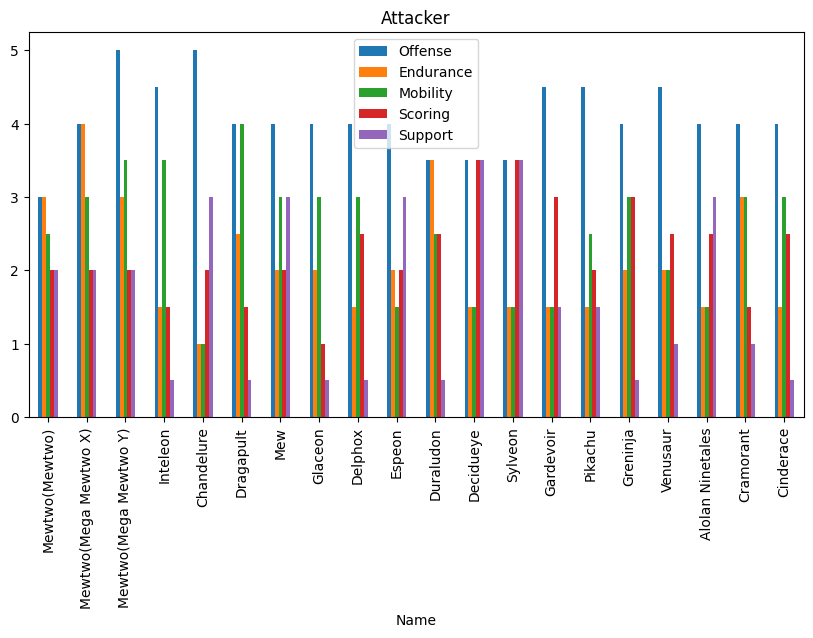

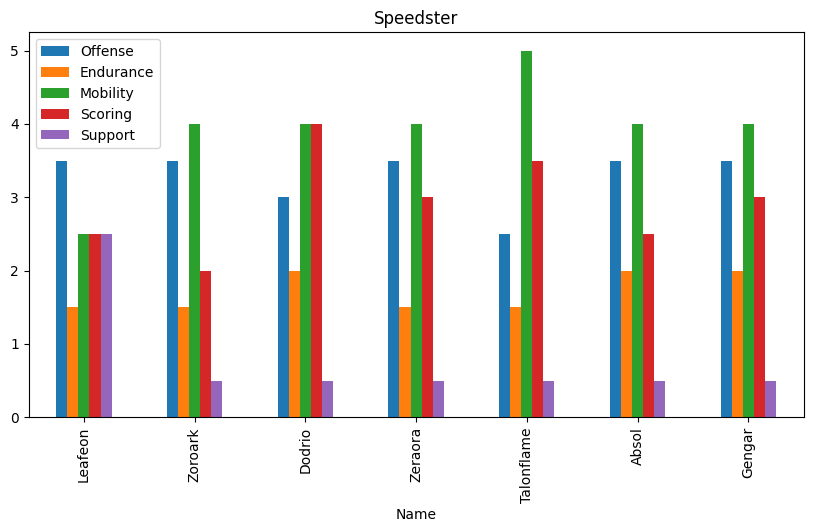

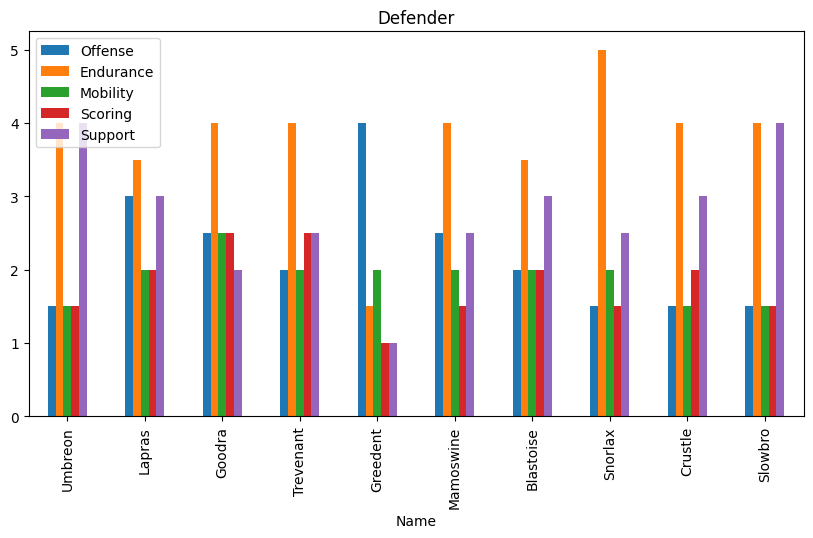

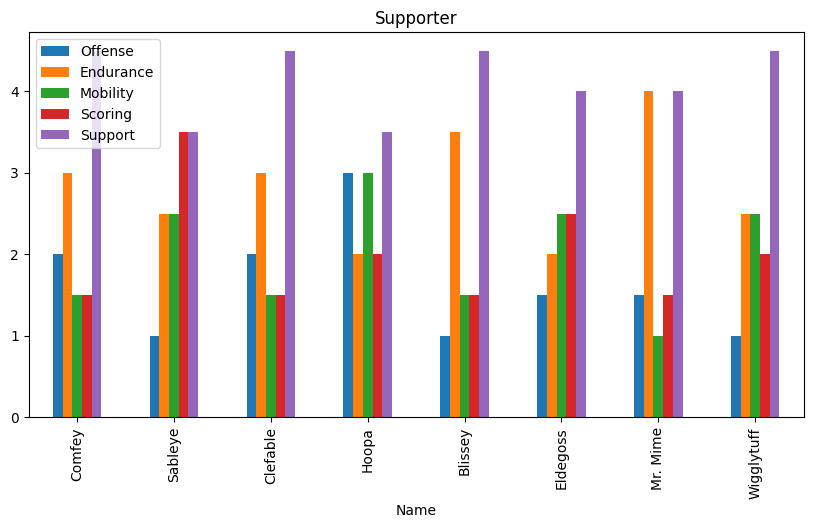

In [14]:
#Plotting Stat distribution role wise
for role in roles:
    plot_stats_by_role(roles[role],role)